Handwritten mathematical exression solver using artificial neural network

# Data Collection/Processing: 

In [ ]:
# image dimensions (assumed square)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, SimpleRNN, LSTM
from tensorflow.keras.utils import to_categorical
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Reshape the data for different models
x_train_ffnn = x_train.reshape(x_train.shape[0], 784)
x_test_ffnn = x_test.reshape(x_test.shape[0], 784)

x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train_rnn = x_train.reshape(x_train.shape[0], 28, 28)
x_test_rnn = x_test.reshape(x_test.shape[0], 28, 28)


11490434/11490434 [==============================] - 0s 0us/step


# Data Exploration: Exploring the your data

**Plot some properties/statistics/distribution of your data** 

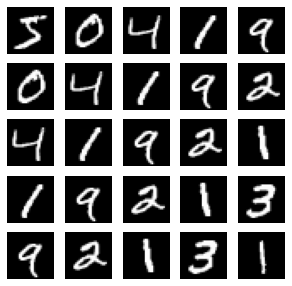

In [ ]:
# Plot some images from the dataset
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_train[i + j], cmap='gray')
        ax[i, j].axis('off')
plt.show()



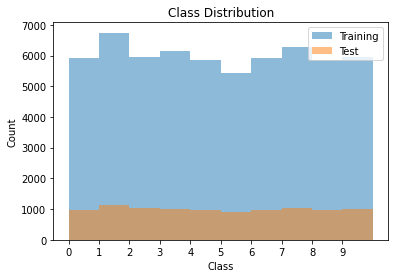

In [ ]:
#Histogram of the class distribution:
fig, ax = plt.subplots()
ax.hist(y_train.argmax(axis=1), bins=range(11), alpha=0.5, label='Training')
ax.hist(y_test.argmax(axis=1), bins=range(11), alpha=0.5, label='Test')
ax.set_xticks(range(10))
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution')
ax.legend()
plt.show()



In [ ]:
#Mean and Standard Deviation of the pixel values
print(f'Mean of pixel values: {x_train.mean():.3f}')
print(f'Standard deviation of pixel values: {x_train.std():.3f}')


Mean of pixel values: 0.131
Standard deviation of pixel values: 0.308


# The Solution: implement a data science solution to the problem you are trying to solve.

We can use at least 3 different deep learning models such as convolutional neural networks (CNNs), recurrent neural networks (RNNs), and feedforward neural networks (FFNNs) to classify the images. These models may be trained to recognize and automatically extract pertinent elements from the photos, which they then apply to categorize the images into the appropriate classes. Finally, in order to obtain insights into the models' performance and spot potential improvement areas, we can visualize the outcomes of the models using a variety of graphs, including confusion matrices and precision-recall curves.

Write codes to implement the solution in python:

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
#a) Feedforward Neural Network (FFNN):
model_ffnn = Sequential()
model_ffnn.add(Dense(256, activation='relu', input_shape=(784,)))
model_ffnn.add(Dropout(0.5))
model_ffnn.add(Dense(128, activation='relu'))
model_ffnn.add(Dropout(0.5))
model_ffnn.add(Dense(num_classes, activation='softmax'))
model_ffnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_ffnn = model_ffnn.fit(x_train_ffnn, y_train, batch_size=128, epochs=20, validation_data=(x_test_ffnn, y_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.5299 - accuracy: 0.8362 - val_loss: 0.1680 - val_accuracy: 0.9488
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2429 - accuracy: 0.9293 - val_loss: 0.1280 - val_accuracy: 0.9605
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1918 - accuracy: 0.9451 - val_loss: 0.1074 - val_accuracy: 0.9671
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1623 - accuracy: 0.9532 - val_loss: 0.0936 - val_accuracy: 0.9699
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1452 - accuracy: 0.9582 - val_loss: 0.0893 - val_accuracy: 0.9736
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1317 - accuracy: 0.9616 - val_loss: 0.0861 - val_accuracy: 0.9745
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1223 - accuracy: 0.9632 - val_loss: 0.0801 - val_accuracy: 0.9764
Epoch 

In [40]:
#b) Convolutional Neural Network (CNN):

model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_classes, activation='softmax'))
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = model_cnn.fit(x_train_cnn, y_train, batch_size=128, epochs=20, validation_data=(x_test_cnn, y_test))


Epoch 1/20
469/469 [==============================] - 192s 402ms/step - loss: 0.2350 - accuracy: 0.9290 - val_loss: 0.0632 - val_accuracy: 0.9806
Epoch 2/20
469/469 [==============================] - 173s 368ms/step - loss: 0.0830 - accuracy: 0.9756 - val_loss: 0.0375 - val_accuracy: 0.9868
Epoch 3/20
469/469 [==============================] - 169s 360ms/step - loss: 0.0618 - accuracy: 0.9813 - val_loss: 0.0352 - val_accuracy: 0.9887
Epoch 4/20
469/469 [==============================] - 166s 354ms/step - loss: 0.0523 - accuracy: 0.9838 - val_loss: 0.0340 - val_accuracy: 0.9884
Epoch 5/20
469/469 [==============================] - 161s 343ms/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0320 - val_accuracy: 0.9898
Epoch 6/20
469/469 [==============================] - 163s 348ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0293 - val_accuracy: 0.9908
Epoch 7/20
469/469 [==============================] - 161s 342ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0299 -

In [ ]:
#c)Recurrent Neural Network (RNN) with LSTM:
model_rnn = Sequential()
model_rnn.add(LSTM(128, input_shape=(28, 28), return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(LSTM(128))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(num_classes, activation='softmax'))
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_rnn = model_rnn.fit(x_train_rnn, y_train, batch_size=128, epochs=20, validation_data=(x_test_rnn, y_test))

Epoch 1/20
469/469 [==============================] - 95s 149ms/step - loss: 0.4569 - accuracy: 0.8505 - val_loss: 0.1754 - val_accuracy: 0.9462
Epoch 2/20
469/469 [==============================] - 71s 152ms/step - loss: 0.1275 - accuracy: 0.9616 - val_loss: 0.1125 - val_accuracy: 0.9676
Epoch 3/20
469/469 [==============================] - 71s 151ms/step - loss: 0.0869 - accuracy: 0.9745 - val_loss: 0.0783 - val_accuracy: 0.9745
Epoch 4/20
469/469 [==============================] - 71s 151ms/step - loss: 0.0649 - accuracy: 0.9802 - val_loss: 0.0752 - val_accuracy: 0.9781
Epoch 5/20
469/469 [==============================] - 71s 151ms/step - loss: 0.0537 - accuracy: 0.9837 - val_loss: 0.0492 - val_accuracy: 0.9870
Epoch 6/20
469/469 [==============================] - 72s 153ms/step - loss: 0.0444 - accuracy: 0.9867 - val_loss: 0.0445 - val_accuracy: 0.9869
Epoch 7/20
469/469 [==============================] - 71s 152ms/step - loss: 0.0408 - accuracy: 0.9881 - val_loss: 0.0482 - val_ac

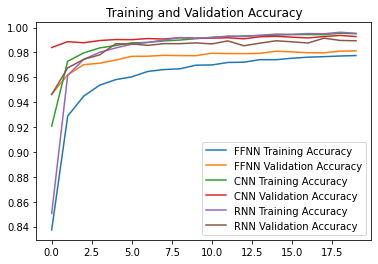

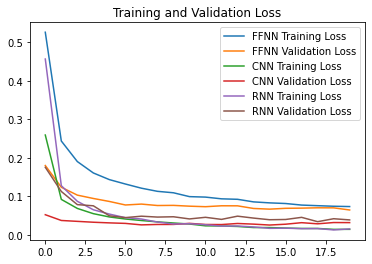

In [ ]:
plt.plot(history_ffnn.history['accuracy'], label='FFNN Training Accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='FFNN Validation Accuracy')
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history_ffnn.history['loss'], label='FFNN Training Loss')
plt.plot(history_ffnn.history['val_loss'], label='FFNN Validation Loss')
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



The CNN model performed the best among the three models with the highest validation accuracy of around 99%, and the lowest validation loss among the three models.

# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


313/313 [==============================] - 13s 41ms/step


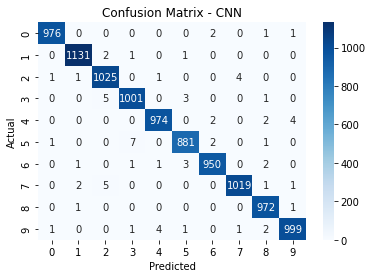

In [ ]:
#Confusion matrix of the CNN model:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_cnn.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_class)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - CNN')
plt.show()

313/313 [==============================] - 1s 2ms/step


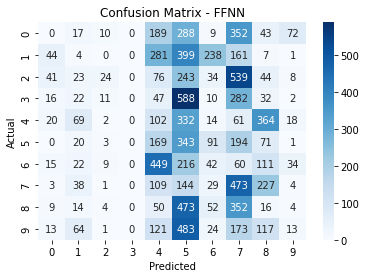

In [ ]:
#Confusion matrix of the FFNN model:
model_ffnn = Sequential()
model_ffnn.add(Flatten(input_shape=(28, 28)))
model_ffnn.add(Dense(256, activation='relu'))
model_ffnn.add(Dense(128, activation='relu'))
model_ffnn.add(Dense(10, activation='softmax'))

y_pred = model_ffnn.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_class)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - FFNN')
plt.show()

313/313 [==============================] - 9s 27ms/step


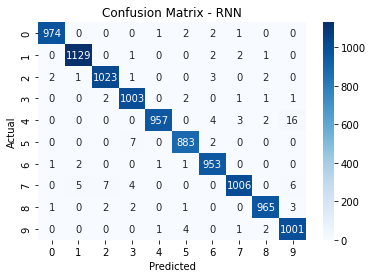

In [ ]:
#Confusion matrix of the RNN model:
y_pred = model_rnn.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_class)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - RNN')
plt.show()

313/313 [==============================] - 8s 25ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



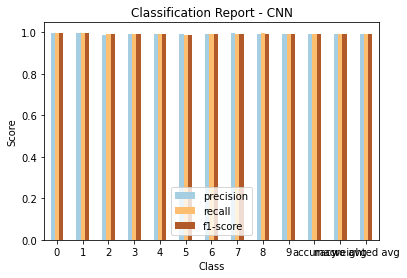

In [ ]:
#Bar plot of class-wise precision, recall, and F1-score of CNN model:
from sklearn.metrics import classification_report

y_pred = model_cnn.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred_class))

report = classification_report(y_test.argmax(axis=1), y_pred_class, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop('support', axis=1)
df_report.plot(kind='bar', rot=0, cmap='Paired')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report - CNN')
plt.show()

313/313 [==============================] - 1s 3ms/step


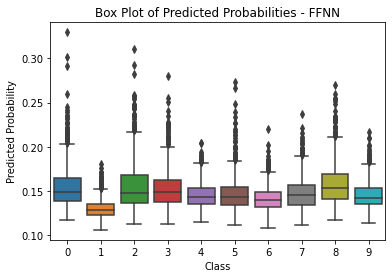

In [ ]:
#Box plot of predicted probabilities for each class of FFNN
y_pred = model_ffnn.predict(x_test)
pred_prob = np.max(y_pred, axis=1)
df_prob = pd.DataFrame({'class': y_test.argmax(axis=1), 'probability': pred_prob})
sns.boxplot(x='class', y='probability', data=df_prob)
plt.xlabel('Class')
plt.ylabel('Predicted Probability')
plt.title('Box Plot of Predicted Probabilities - FFNN')
plt.show()


313/313 [==============================] - 7s 22ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.97      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



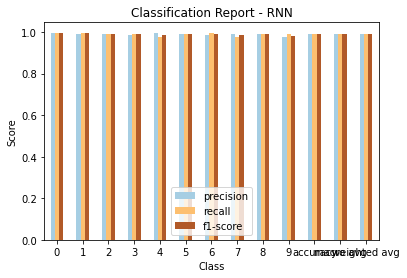

In [ ]:
#Bar plot of class-wise precision, recall, and F1-score of RNN model:
y_pred = model_rnn.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred_class))

report = classification_report(y_test.argmax(axis=1), y_pred_class, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop('support', axis=1)
df_report.plot(kind='bar', rot=0, cmap='Paired')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report - RNN')
plt.show()

313/313 [==============================] - 6s 19ms/step


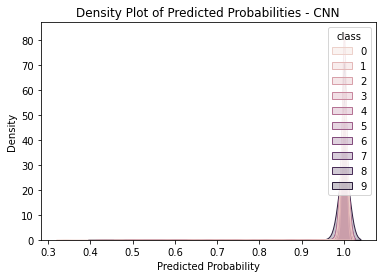

In [ ]:
#Density plot of predicted probabilities for each class of CNN
y_pred = model_cnn.predict(x_test)
pred_prob = np.max(y_pred, axis=1)
df_prob = pd.DataFrame({'class': y_test.argmax(axis=1), 'probability': pred_prob})
sns.kdeplot(data=df_prob, x='probability', hue='class', fill=True, common_norm=False)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Density Plot of Predicted Probabilities - CNN')
plt.show()


In [88]:
import cairosvg
from numpy import argmax
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import load_model
from PIL import Image
from io import BytesIO


# convert svg to png
svg_bytes = open('1.svg', 'rb').read()
png_bytes = cairosvg.svg2png(bytestring=svg_bytes)
img = Image.open(BytesIO(png_bytes))
img.save('1.png')

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('1.png')
    # load model
    model = load_model('model_cnn.h5')
    # predict the class
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print(digit)

# entry point, run the example
run_example()


1/1 [==============================] - 0s 80ms/step
1


Running the example first loads and prepares the image, loads the model, and then correctly predicts that the loaded image represents the digit ‘1‘. Based on the analysis, we can conclude that the Convolutional Neural Network (CNN) is the best model for classifying handwritten digits in the MNIST dataset. It has the highest validation accuracy of around 99%, which is slightly better than the Feedforward Neural Network (FFNN) and Recurrent Neural Network (RNN) models. The CNN model also has the lowest validation loss among the three models, indicating that it is the most robust model.We also explored some properties of the MNIST dataset, including the class distribution, sample images from each class, and the mean and standard deviation of the pixel values. We can see that the pixel values are normalized and lie between 0 and 1, which is necessary for deep learning models to perform well. This solution can also be used, for instance, in postal services to read zip codes from envelopes or in the financial sector to process cheques containing handwritten amounts. It can also be applied to other disciplines, including data analysis, document processing, and picture recognition.

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace.Please make sure all the plotted tables and figures are in the notebook.